# Fit the data
- New:
    - We take into account the component $B^0 \to D^{*-} K^+ \pi^+ \pi^-$
    - Cut PIDK < 4 for the 3 $\pi$ 

- Fit on $m(B^0_s)$ with:
    - Signal $B^0 \to D^{*-} \pi^+ \pi^+ \pi^-$
    - Background $B^0 \to D^{*-} D_s^+$ with simultaneous fit on $m(D_s\to 3\pi)$
    - Background of misidentified pions: $B^0 \to D^{*-} K^+ \pi^+ \pi^-$
    - Background of partially reconstructed decays $B^0 \to D^{*-} \pi^+ \pi^+ \pi^- h$
    - Combinatorial background (exponential)

## Import

In [1]:
import zfit
import json
import numpy as np

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets

import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, save_params, plot_hist_fit, plot_hist_fit_particle

Welcome to JupyROOT 6.22/02


## Load

In [2]:
with open(f'{loc.JSON}/MC_cutallPIDK_params.json', 'r') as f:
    MC_param_results = json.load(f)

with open(f'{loc.JSON}/data_KPiPi_2_params.json', 'r') as f:
    data_KPiPi_params = json.load(f)

    
for var in 'muL', 'muR', 'sigmaL', 'sigmaR':
    data_KPiPi_params[var] = data_KPiPi_params[var]*1000
    data_KPiPi_params[f"{var}_err"] = data_KPiPi_params[f"{var}_err"]*1000

In [3]:
df_data_strip = fct.load_data(years, magnets, type_data='data_strip', vars=['B0_M','tau_M', 'BDT'],
                            cut_DeltaM=True, cut_PIDK='ALL')

/afs/cern.ch/user/c/correian/bd2dst3pi/output/root/data_strip.root


In [4]:
df = {}

In [5]:
name_data = 'data_strip_cutDeltaM_allPIDK'

## BDT cut

In [6]:
cut_BDT = -0.15
k = str(cut_BDT)

In [7]:
df[k] = df_data_strip.query(f"BDT > {cut_BDT}")

In [8]:
cut_BDT_ref = -0.2

with open(f'{loc.JSON}/cut_allPIDK_BDT{cut_BDT_ref}_params.json', 'r') as f:
    cut_allPIDK_params_recup = json.load(f)

In [9]:
cut_allPIDK_params = {}
for key, value in cut_allPIDK_params_recup.items():
    
    if not key.endswith('_err'):
        index = key.find('|')
        cut_allPIDK_params[key[:index]] = value

In [10]:
cut_allPIDK_params

{'lambda_tau': -0.0025247491173956355,
 'lambda': -0.0009699403886273402,
 'mu2': 5059.579351666309,
 'mu_tau': 1968.5511489932228,
 'mu': 5279.361680225111,
 'n_bkg2': 33181.79448480732,
 'n_bkgK': 1474.6307438426306,
 'n_bkg_tau': 37485.395000603945,
 'n_bkg': 87455.63844076353,
 'n_sig_tau': 9685.167448511847,
 'n_sig': 118931.84518544718,
 'sigma2': 54.81124875664343,
 'sigma_tau': 9.374291597930291,
 'sigma': 17.807829510293253}

## Distributions

### Init

In [11]:
# mass of Ds: 1,968 MeV
size_tau_M = 80.
low_tau_M = 1970. - size_tau_M
high_tau_M = 1970. + size_tau_M

In [12]:
n_events_B0_M = {}
d_initial_values = {}
n_Ds = {}
low = 5050.
high = 5550.

### Distribution $m(D_s\to3\pi)$

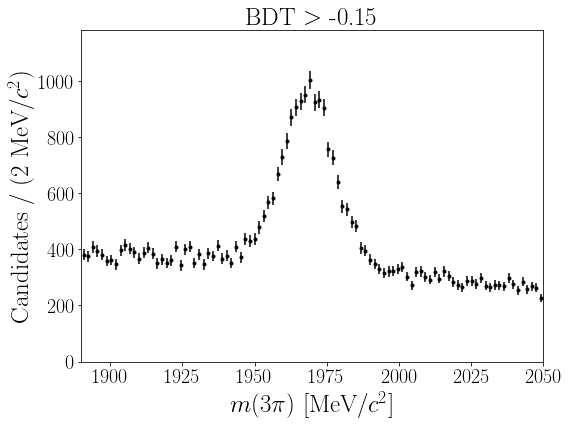

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/tau_M_data_strip_cutDeltaM_allPIDK_BDT-0.15.pdf


In [16]:
fct.plot_hist_particle({name_data:df[k]},'tau_M',
              low = low_tau_M, high = high_tau_M, cut_BDT=cut_BDT,
              n_bins = 100, mode_hist = False, colors='black')

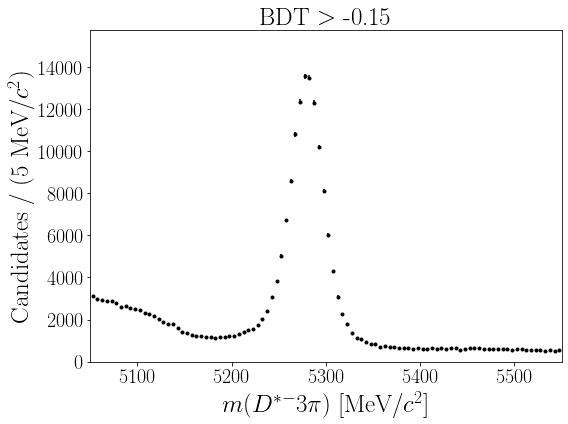

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/B0_M_data_strip_cutDeltaM_allPIDK_BDT-0.15.pdf


In [17]:
fct.plot_hist_particle({name_data:df[k]},'B0_M',
              low = low, high = high, cut_BDT=cut_BDT,
              n_bins = 100, mode_hist = False, colors='black')

## Simultaneous fit on $m(D_s\to3\pi)$ and $m(B^0)$

### Values for the fit $m(D_s\to3\pi)$

In [13]:
d_initial_values_tau = {}
n_events_tau_M = {}

In [14]:
n_events_tau_M[k] = len(df[k].query(f'tau_M > {low_tau_M} and tau_M < {high_tau_M}'))

In [15]:
# n_events_tau_M_v = n_events_tau_M['-0.2']
# # n_sig_tau|-0.2         9686     +/- 1.7e+02  -1.7e+02   +1.7e+02       False
# # n_bkg_tau|-0.2        37480     +/- 2.4e+02  -2.4e+02   +2.4e+02       False
# # mu_tau|-0.2            1969     +/-    0.17  -   0.17   +   0.17       False
# # sigma_tau|-0.2        9.375     +/-    0.17  -   0.17   +   0.17       False
# # lambda_tau|-0.2   -0.002523     +/- 0.00011  -0.00011   +0.00011       False
# d_initial_values_tau['-0.2'] = { # it seems that this one works with almost every BDT cut....
#     'mu_tau': {
#         'value' : 1969.,
#         'low': 1965.,
#         'high': 1975.,     
#     },
#     'sigma_tau': {
#         'value' : 9.4,
#         'low': 5.,
#         'high': 15.,
#     },
#     'n_bkg_tau': {
#         'value' : 37000,
#         'low': 0,
#         'high': n_events_tau_M_v,  
#     },
#     'n_sig_tau': {
#         'value' : 9700,
#         'low': 0,
#         'high': n_events_tau_M_v,  
#     },
#     'lambda_tau': {
#         'value' : -0.002,
#         'low': -0.01,
#         'high': -0.0001  
#     }
# }

# n_events_tau_M_v = n_events_tau_M['-0.1']
# d_initial_values_tau['-0.1'] = { # it seems that this one works with almost every BDT cut....
#     'mu_tau': {
#         'value' : 1969.,
#         'low': 1965.,
#         'high': 1975.,     
#     },
#     'sigma_tau': {
#         'value' : 9.4,
#         'low': 5.,
#         'high': 15.,
#     },
#     'n_bkg_tau': {
#         'value' : 37000,
#         'low': 0,
#         'high': n_events_tau_M_v,  
#     },
#     'n_sig_tau': {
#         'value' : 9700,
#         'low': 0,
#         'high': n_events_tau_M_v,  
#     },
#     'lambda_tau': {
#         'value' : -0.002,
#         'low': -0.01,
#         'high': -0.0001  
#     }
# }

#      n_sig_tau|0 = +7139.362074
#      n_bkg_tau|0 = +21463.012932
#         mu_tau|0 = +1968.546962
#      sigma_tau|0 = +9.236429
#     lambda_tau|0 = -0.002553

# n_events_tau_M_v = n_events_tau_M['0.1']
# d_initial_values_tau['-0.1'] = { # it seems that this one works with almost every BDT cut....
#     'mu_tau': {
#         'value' : cut_allPIDK_params['mu_tau'],
#         'low': 1965.,
#         'high': 1975.,     
#     },
#     'sigma_tau': {
#         'value' : cut_allPIDK_params['sigma_tau'],
#         'low': 5.,
#         'high': 15.,
#     },
#     'n_bkg_tau': {
#         'value' : 21000,
#         'low': 0,
#         'high': n_events_tau_M_v,  
#     },
#     'n_sig_tau': {
#         'value' : 7100,
#         'low': 0,
#         'high': n_events_tau_M_v,  
#     },
#     'lambda_tau': {
#         'value' : cut_allPIDK_params['lambda_tau'],
#         'low': -0.01,
#         'high': -0.0001  
#     }
# }



n_events_tau_M_v = n_events_tau_M[k]
d_initial_values_tau[k] = { # it seems that this one works with almost every BDT cut....
    'mu_tau': {
        'value' : cut_allPIDK_params['mu_tau'],
        'low': 1965.,
        'high': 1975.,     
    },
    'sigma_tau': {
        'value' : cut_allPIDK_params['sigma_tau'],
        'low': 5.,
        'high': 15.,
    },
    'n_bkg_tau': {
        'value' : cut_allPIDK_params['n_bkg_tau'],
        'low': 0,
        'high': n_events_tau_M_v,  
    },
    'n_sig_tau': {
        'value' : cut_allPIDK_params['n_sig_tau'],
        'low': 0,
        'high': n_events_tau_M_v,  
    },
    'lambda_tau': {
        'value' : cut_allPIDK_params['lambda_tau'],
        'low': -0.01,
        'high': -0.0001  
    }
}

### Values for the fit $m(B^0)$

In [16]:
n_events_B0_M[k] = len(df[k].query(f'B0_M > {low} and B0_M < {high}'))



# n_events_B0_M_k = n_events_B0_M['-0.2']

# n_sig_k = 119000
# n_bkg_k = 87000
# n_bkg2_k = 33000
# n_bkgK_k = 1500

# # name                  value    minuit_hesse         minuit_minos    at limit
# # ---------------  ----------  --------------  -------------------  ----------
# # n_sig|-0.2           118900     +/- 5.3e+02  -5.3e+02   +5.6e+02       False
# # n_bkg|-0.2            87520     +/- 1.4e+03  -1.5e+03   +1.3e+03       False
# # n_bkg2|-0.2           33130     +/- 7.7e+02  -7.7e+02   +7.7e+02       False
# # n_bkgK|-0.2            1474     +/- 5.4e+02  -5.3e+02   +5.6e+02       False
# # mu|-0.2                5279     +/-   0.068  -  0.068   +  0.068       False
# # sigma|-0.2            17.81     +/-   0.072  -  0.072   +  0.076       False
# # lambda|-0.2      -0.0009742     +/- 8.9e-05  -8.9e-05   +8.9e-05       False
# # mu2|-0.2               5060     +/-     2.2  -    2.4   +    2.1       False
# # sigma2|-0.2           54.73     +/-     1.6  -    1.6   +    1.8       False

# d_initial_values['-0.2'] = {
#     'mu'       :{ 'value': 5279.                        , 'low': 5279.-2.                     , 'high': 5279.+3.                    , 'floating': True},
#     'sigma'    :{ 'value': 17.5                         , 'low': 17.-5.                       , 'high': 17.+5.                      , 'floating': True},
#     'alphaL'   :{ 'value': MC_param_results['alphaL_MC'], 'low': None                         , 'high': None                        , 'floating': False},
#     'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 1.                           , 'high': 8.                          , 'floating': False},
#     'nL'       :{ 'value': MC_param_results['nL_MC']    , 'low': 0.1                          , 'high': 5.                          , 'floating': False},
#     'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 1.                           , 'high': 15.                         , 'floating': False},
#     'n_sig'    :{ 'value': n_sig_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'lambda'   :{ 'value': -0.0009                      , 'low': -0.005                        ,'high': -0.00004                    , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'mu2'      :{ 'value': 5060.                        , 'low': 5045.                        , 'high': 5070.                       , 'floating': True},
#     'sigma2'   :{ 'value': 60.                          , 'low': 45.                          , 'high': 75.                         , 'floating': True},
#     'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'n_bkgK'   :{ 'value': n_bkgK_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
# }
# # 2 fits performed



# n_sig|-0.15          114200     +/-   5e+02  -5.1e+02   +  5e+02       False
# n_bkg|-0.15           71680     +/- 1.3e+03  -1.3e+03   +1.3e+03       False
# n_bkg2|-0.15          31740     +/- 6.9e+02  -7.6e+02   +6.9e+02       False
# n_bkgK|-0.15           1116     +/- 5.5e+02  -4.8e+02   +5.3e+02       False
# mu|-0.15               5279     +/-   0.068  -  0.068   +  0.068       False
# sigma|-0.15            17.8     +/-    0.07  -  0.074   +  0.072       False
# lambda|-0.15      -0.001056     +/-  0.0001  - 0.0001   + 0.0001       False
# mu2|-0.15              5060     +/-     1.9  -    1.9   +    1.9       False
# sigma2|-0.15          54.55     +/-     1.4  -    1.4   +    1.7       False

n_events_B0_M_k = n_events_B0_M[k]

n_sig_k = 114000
n_bkg_k = 72000
n_bkg2_k = 31740
n_bkgK_k = 1100

d_initial_values[k] = {
    'mu'       :{ 'value': cut_allPIDK_params['mu']     , 'low': 5279.-1.                     , 'high': 5279.+1.                    , 'floating': True},
    #'sigma'    :{ 'value': cut_allPIDK_params['sigma']  , 'low': 17.-3.                       , 'high': 17.+3.                      , 'floating': True}, # For BDT > 0.3
    'sigma'    :{ 'value': cut_allPIDK_params['sigma']  , 'low': 17.-1.                       , 'high': 17.+1.                      , 'floating': True},
    'alphaL'   :{ 'value': MC_param_results['alphaL_MC'], 'low': None                         , 'high': None                        , 'floating': False},
    'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 1.                           , 'high': 8.                          , 'floating': False},
    'nL'       :{ 'value': MC_param_results['nL_MC']    , 'low': 0.1                          , 'high': 5.                          , 'floating': False},
    'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 1.                           , 'high': 15.                         , 'floating': False},
    'n_sig'    :{ 'value': n_sig_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
    'lambda'   :{ 'value': -0.001                       , 'low': -0.01                         ,'high': -0.0001                    , 'floating': True},
    'n_bkg'    :{ 'value': n_bkg_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
    'mu2'      :{ 'value': 5060.                        , 'low': 5050.                        , 'high': 5070.                       , 'floating': True},
    'sigma2'   :{ 'value': 55.                          , 'low': 45.                          , 'high': 65.                         , 'floating': True},
    'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
    'n_bkgK'   :{ 'value': n_bkgK_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
}



# n_events_B0_M_k = n_events_B0_M['-0.1']

# n_sig_k = 119000
# n_bkg_k = 87000
# n_bkg2_k = 33000
# n_bkgK_k = 1500

# d_initial_values['-0.1'] = {
#     'mu'       :{ 'value': 5279.                        , 'low': 5279.-2.                     , 'high': 5279.+3.                    , 'floating': True},
#     'sigma'    :{ 'value': 17.5                         , 'low': 17.-5.                       , 'high': 17.+5.                      , 'floating': True},
#     'alphaL'   :{ 'value': MC_param_results['alphaL_MC'], 'low': None                         , 'high': None                        , 'floating': False},
#     'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 1.                           , 'high': 8.                          , 'floating': False},
#     'nL'       :{ 'value': MC_param_results['nL_MC']    , 'low': 0.1                          , 'high': 5.                          , 'floating': False},
#     'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 1.                           , 'high': 15.                         , 'floating': False},
#     'n_sig'    :{ 'value': n_sig_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'lambda'   :{ 'value': -0.0009                      , 'low': -0.005                        ,'high': -0.00004                    , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'mu2'      :{ 'value': 5060.                        , 'low': 5045.                        , 'high': 5070.                       , 'floating': True},
#     'sigma2'   :{ 'value': 60.                          , 'low': 45.                          , 'high': 75.                         , 'floating': True},
#     'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'n_bkgK'   :{ 'value': n_bkgK_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
# }


# n_events_B0_M_k = n_events_B0_M[k]

# n_sig_k = cut_allPIDK_params['n_sig']
# n_bkg_k = cut_allPIDK_params['n_bkg']
# n_bkg2_k = cut_allPIDK_params['n_bkg2']
# n_bkgK_k = cut_allPIDK_params['n_bkgK']

# d_initial_values['0.05'] = {
#     'mu'       :{ 'value': cut_allPIDK_params['mu']     , 'low': 5279.-1.                     , 'high': 5279.+1.                    , 'floating': True},
#     'sigma'    :{ 'value': cut_allPIDK_params['sigma']  , 'low': 17.-1.                       , 'high': 17.+1.                      , 'floating': True},
#     'alphaL'   :{ 'value': MC_param_results['alphaL_MC'], 'low': None                         , 'high': None                        , 'floating': False},
#     'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 1.                           , 'high': 8.                          , 'floating': False},
#     'nL'       :{ 'value': MC_param_results['nL_MC']    , 'low': 0.1                          , 'high': 5.                          , 'floating': False},
#     'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 1.                           , 'high': 15.                         , 'floating': False},
#     'n_sig'    :{ 'value': n_sig_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'lambda'   :{ 'value': cut_allPIDK_params['lambda'] , 'low': -0.01                         ,'high': -0.00001                    , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'mu2'      :{ 'value': cut_allPIDK_params['mu2']    , 'low': 5045.                        , 'high': 5070.                       , 'floating': True},
#     'sigma2'   :{ 'value': cut_allPIDK_params['sigma2'] , 'low': 45.                          , 'high': 70.                         , 'floating': True},
#     'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'n_bkgK'   :{ 'value': n_bkgK_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
# }


# n_events_B0_M_k = n_events_B0_M['0.05']


# # name                 value    minuit_hesse         minuit_minos    at limit
# # ---------------  ---------  --------------  -------------------  ----------
# # n_sig|0.05           79780     +/- 3.9e+02  -3.8e+02   +3.9e+02       False
# # n_bkg|0.05           26160     +/- 1.1e+03  -9.3e+02   +1.1e+03       False
# # n_bkg2|0.05          21430     +/- 5.3e+02  -5.3e+02   +5.3e+02       False
# # n_bkgK|0.05          358.9     +/- 4.9e+02  -3.2e+02   +3.8e+02       False
# # mu|0.05               5279     +/-   0.079  -  0.079   +  0.078       False
# # sigma|0.05           17.59     +/-   0.078  -  0.079   +   0.08       False
# # lambda|0.05      -0.001559     +/- 0.00022  -0.00022   + 0.0002       False
# # mu2|0.05              5063     +/-       2  -      2   +    2.1       False
# # sigma2|0.05          53.01     +/-     1.6  -    1.6   +    1.6       False
        
# n_sig_k = 80000
# n_bkg_k = 17000
# n_bkg2_k = 25000
# n_bkgK_k = 400

# d_initial_values['0.05'] = {
#     'mu'       :{ 'value': cut_allPIDK_params['mu']     , 'low': 5279.-1.                     , 'high': 5279.+1.                    , 'floating': True},
#     'sigma'    :{ 'value': cut_allPIDK_params['sigma']  , 'low': 17.-3.                       , 'high': 17.+3.                      , 'floating': True},
#     'alphaL'   :{ 'value': MC_param_results['alphaL_MC'], 'low': None                         , 'high': None                        , 'floating': False},
#     'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 1.                           , 'high': 8.                          , 'floating': False},
#     'nL'       :{ 'value': MC_param_results['nL_MC']    , 'low': 0.1                          , 'high': 5.                          , 'floating': False},
#     'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 1.                           , 'high': 15.                         , 'floating': False},
#     'n_sig'    :{ 'value': n_sig_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'lambda'   :{ 'value': cut_allPIDK_params['lambda'] , 'low': -0.1                         ,'high': -0.00008                  , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'mu2'      :{ 'value': cut_allPIDK_params['mu2']    , 'low': 5040.                        , 'high': 5070.                       , 'floating': True},
#     'sigma2'   :{ 'value': cut_allPIDK_params['sigma2'] , 'low': 20.                          , 'high': 70.                         , 'floating': True},
#     'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'n_bkgK'   :{ 'value': n_bkgK_k                     , 'low': 0                            , 'high': n_events_B0_M_k/10          , 'floating': True},
# }


# n_events_B0_M_k = n_events_B0_M['0.1']

# n_sig_k = 68000
# n_bkg_k = 18000
# n_bkg2_k = 18000
# n_bkgK_k = 220

# # n_sig|0.1           67680     +/- 3.5e+02  -3.5e+02   +3.6e+02       False
# # n_bkg|0.1           18430     +/- 7.7e+02  -8.1e+02   +7.7e+02       False
# # n_bkg2|0.1          18080     +/- 4.6e+02  -4.6e+02   +  5e+02       False
# # n_bkgK|0.1          221.2     +/- 3.1e+02  -2.2e+02   +3.2e+02       False
# # mu|0.1               5279     +/-   0.083  -  0.083   +  0.083       False
# # sigma|0.1           17.59     +/-   0.083  -  0.083   +  0.083       False
# # lambda|0.1      -0.001705     +/- 0.00022  -0.00022   +0.00024       False
# # mu2|0.1              5062     +/-     2.1  -    2.1   +    2.1       False
# # sigma2|0.1          53.34     +/-     1.6  -    1.7   +    1.6       False


# d_initial_values['0.1'] = {
#     'mu'       :{ 'value': cut_allPIDK_params['mu']     , 'low': 5279.-1.                     , 'high': 5279.+1.                    , 'floating': True},
#     'sigma'    :{ 'value': cut_allPIDK_params['sigma']  , 'low': 17.-1.                       , 'high': 17.+1.                      , 'floating': True},
#     'alphaL'   :{ 'value': MC_param_results['alphaL_MC'], 'low': None                         , 'high': None                        , 'floating': False},
#     'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 1.                           , 'high': 8.                          , 'floating': False},
#     'nL'       :{ 'value': MC_param_results['nL_MC']    , 'low': 0.1                          , 'high': 5.                          , 'floating': False},
#     'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 1.                           , 'high': 15.                         , 'floating': False},
#     'n_sig'    :{ 'value': n_sig_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'lambda'   :{ 'value': -0.0002                      , 'low': -0.01                         ,'high': -0.00001                    , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'mu2'      :{ 'value': 5060.                        , 'low': 5045.                        , 'high': 5070.                       , 'floating': True},
#     'sigma2'   :{ 'value': 54.                          , 'low': 45.                          , 'high': 65.                         , 'floating': True},
#     'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'n_bkgK'   :{ 'value': n_bkgK_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
# }


# n_events_B0_M_k = n_events_B0_M['0.15']

# n_sig_k = 55000
# n_bkg_k = 12000
# n_bkg2_k = 15000
# n_bkgK_k = 30

# # n_sig|0.15           54580     +/- 3.1e+02  -3.1e+02   +3.1e+02       False
# # n_bkg|0.15           12390     +/- 6.7e+02  -6.7e+02   +5.9e+02       False
# # n_bkg2|0.15          14720     +/- 4.2e+02  -4.2e+02   +4.2e+02       False
# # n_bkgK|0.15          30.64     +/- 2.7e+02  -     31   +2.7e+02       False
# # mu|0.15               5279     +/-   0.093  -  0.092   +  0.092       False
# # sigma|0.15           17.66     +/-   0.093  -  0.092   +  0.092       False
# # lambda|0.15      -0.001898     +/- 0.00028  -0.00024   + 0.0003       False
# # mu2|0.15              5063     +/-     2.5  -    2.6   +    2.5       False
# # sigma2|0.15          53.29     +/-     1.9  -    1.9   +      2       False


# d_initial_values['0.15'] = {
#     'mu'       :{ 'value': cut_allPIDK_params['mu']     , 'low': 5279.-1.                     , 'high': 5279.+1.                    , 'floating': False},
#     'sigma'    :{ 'value': cut_allPIDK_params['sigma']  , 'low': 17.-1.                       , 'high': 17.+1.                      , 'floating': False},
#     'alphaL'   :{ 'value': MC_param_results['alphaL_MC'], 'low': None                         , 'high': None                        , 'floating': False},
#     'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 1.                           , 'high': 8.                          , 'floating': False},
#     'nL'       :{ 'value': MC_param_results['nL_MC']    , 'low': 0.1                          , 'high': 5.                          , 'floating': False},
#     'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 1.                           , 'high': 15.                         , 'floating': False},
#     'n_sig'    :{ 'value': n_sig_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'lambda'   :{ 'value': -0.002                       , 'low': -0.05                         ,'high': -0.0005                    , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'mu2'      :{ 'value': 5063                         , 'low': 5055.                        , 'high': 5070.                       , 'floating': True},
#     'sigma2'   :{ 'value': 53.6                         , 'low': 48.                          , 'high': 58.                         , 'floating': True},
#     'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'n_bkgK'   :{ 'value': n_bkgK_k                     , 'low': 0                            , 'high': n_events_B0_M_k/10          , 'floating': True},
# }

# n_sig|0.2           41260     +/- 2.6e+02  -2.7e+02   +2.6e+02       False
# n_bkg|0.2            7760     +/- 1.3e+03  -5.6e+02   +4.8e+02       False
# n_bkg2|0.2          11240     +/- 2.2e+02  -3.6e+02   +2.2e+02       False
# n_bkgK|0.2         0.1817     +/- 1.5e+02  -4.5e+04   +4.5e+04       False
# mu|0.2               5279     +/-    0.19  -    0.1   +   0.19       False
# sigma|0.2            17.7     +/-    0.16  -   0.16   +   0.16       False
# lambda|0.2      -0.002008     +/- 0.00084  -0.00031   +0.00039       False
# mu2|0.2              5063     +/-     3.1  -      3   +    3.1       False
# sigma2|0.2          53.75     +/-     4.8  -    4.7   +    2.2       False


# n_events_B0_M_k = n_events_B0_M['0.2']

# n_sig_k = 41230
# n_bkg_k = 7833
# n_bkg2_k = 11180
# n_bkgK_k = 9.7

# d_initial_values['0.2'] = {
#     'mu'       :{ 'value': cut_allPIDK_params['mu']     , 'low': 5279.-1.                     , 'high': 5279.+1.                    , 'floating': True},
#     'sigma'    :{ 'value': cut_allPIDK_params['sigma']  , 'low': 17.-1.                       , 'high': 17.+1.                      , 'floating': True},
#     'alphaL'   :{ 'value': MC_param_results['alphaL_MC'], 'low': None                         , 'high': None                        , 'floating': False},
#     'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 1.                           , 'high': 8.                          , 'floating': False},
#     'nL'       :{ 'value': MC_param_results['nL_MC']    , 'low': 0.1                          , 'high': 5.                          , 'floating': False},
#     'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 1.                           , 'high': 15.                         , 'floating': False},
#     'n_sig'    :{ 'value': n_sig_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'lambda'   :{ 'value': -0.002                       , 'low': -0.008                     ,'high': -0.0001                        , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'mu2'      :{ 'value': cut_allPIDK_params['mu2']    , 'low': 5045.                        , 'high': 5070.                       , 'floating': True},
#     'sigma2'   :{ 'value': cut_allPIDK_params['sigma2'] , 'low': 45.                          , 'high': 65.                         , 'floating': True},
#     'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'n_bkgK'   :{ 'value': n_bkgK_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
# }




# n_events_B0_M_k = n_events_B0_M[k]

# n_sig_k = cut_allPIDK_params['n_sig']
# n_bkg_k = cut_allPIDK_params['n_bkg']
# n_bkg2_k = cut_allPIDK_params['n_bkg2']
# n_bkgK_k = cut_allPIDK_params['n_bkgK']

# d_initial_values[k] = {
#     'mu'       :{ 'value': cut_allPIDK_params['mu']     , 'low': 5279.-1.                     , 'high': 5279.+1.                    , 'floating': True},
#     #'sigma'    :{ 'value': cut_allPIDK_params['sigma']  , 'low': 17.-3.                       , 'high': 17.+3.                      , 'floating': True}, # For BDT > 0.3
#     'sigma'    :{ 'value': cut_allPIDK_params['sigma']  , 'low': 17.-1.                       , 'high': 17.+1.                      , 'floating': True},
#     'alphaL'   :{ 'value': MC_param_results['alphaL_MC'], 'low': None                         , 'high': None                        , 'floating': False},
#     'alphaR'   :{ 'value': MC_param_results['alphaR_MC'], 'low': 1.                           , 'high': 8.                          , 'floating': False},
#     'nL'       :{ 'value': MC_param_results['nL_MC']    , 'low': 0.1                          , 'high': 5.                          , 'floating': False},
#     'nR'       :{ 'value': MC_param_results['nR_MC']    , 'low': 1.                           , 'high': 15.                         , 'floating': False},
#     'n_sig'    :{ 'value': n_sig_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'lambda'   :{ 'value': cut_allPIDK_params['lambda'] , 'low': -0.01                         ,'high': -0.00001                    , 'floating': True},
#     'n_bkg'    :{ 'value': n_bkg_k                      , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'mu2'      :{ 'value': cut_allPIDK_params['mu2']    , 'low': 5045.                        , 'high': 5070.                       , 'floating': True},
#     'sigma2'   :{ 'value': cut_allPIDK_params['sigma2'] , 'low': 45.                          , 'high': 70.                         , 'floating': True},
#     'n_bkg2'   :{ 'value': n_bkg2_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
#     'n_bkgK'   :{ 'value': n_bkgK_k                     , 'low': 0                            , 'high': n_events_B0_M_k             , 'floating': True},
# }




for var in 'muL', 'muR', 'sigmaL', 'sigmaR', 'nL', 'nR', 'alphaL', 'alphaR', 'nL', 'nR', 'fraction':
    d_initial_values[k][f'{var}_K'] = {'value': data_KPiPi_params[var], 'low': None, 'high': None, 'floating': False}

In [17]:
cut_allPIDK_params['lambda']

-0.0009699403886273402

## Simultaneous fit

### Observables and variables

In [18]:
obs_tau = zfit.Space("x", limits=(low_tau_M, high_tau_M))
zparams_tau = {}

initial_values_tau = d_initial_values_tau[k]

for var_tau in initial_values_tau.keys():
    zparams_tau[var_tau] = zfit.Parameter(f"{var_tau}|{cut_BDT}", initial_values_tau[var_tau]['value'], 
                                     initial_values_tau[var_tau]['low'], initial_values_tau[var_tau]['high'])

In [19]:
obs = zfit.Space("x", limits=(low, high))
initial_values = d_initial_values[k]
zparams = {}
for var in initial_values.keys():
    zparams[var] = zfit.Parameter(f"{var}|{cut_BDT}",
                                  initial_values[var]['value'], 
                                  initial_values[var]['low'], 
                                  initial_values[var]['high'],
                                  floating = initial_values[var]['floating'])
    #print(zparams[var])

In [20]:
name_params_tau = {
    f'mu_tau|{cut_BDT}':'$\mu_{m_{D_s}}$',
    f'sigma_tau|{cut_BDT}':'$\sigma_{m_{D_s}}$',
    f'n_bkg_tau|{cut_BDT}':'$n_{bkg,c}$',
    f'n_sig_tau|{cut_BDT}':'$n_{sig,D_s}$',
    f'lambda_tau|{cut_BDT}':'$\\lambda$',
}

name_params = {
    f'mu|{cut_BDT}'      : '$\mu$',
    f'sigma|{cut_BDT}'   : '$\sigma$',
    f'alphaL|{cut_BDT}'  : '$\\alpha_L$',
    f'alphaR|{cut_BDT}'  : '$\\alpha_R$',
    f'nL|{cut_BDT}'      : '$n_L$',
    f'nR|{cut_BDT}'      : '$n_R$',
    f'n_bkg|{cut_BDT}'   : '$n_{bkg,c}$',
    f'n_sig|{cut_BDT}'   : '$n_{sig,D^*3\pi}$',
    f'lambda|{cut_BDT}'  : '$\\lambda$',
    f'mu2|{cut_BDT}'     : '$\\mu_2$',
    f'sigma2|{cut_BDT}'  : '$\\sigma_2$',
    f'n_bkg2|{cut_BDT}'  : '$n_{bkg,D^*3\pi h}$',
    f'n_bkgK|{cut_BDT}'  : '$n_{bkg,D^*K\pi\pi}$',
}

### PDFs

In [21]:
gaussian_tau = zfit.pdf.Gauss(zparams_tau["mu_tau"],zparams_tau["sigma_tau"],obs=obs_tau)
exponential_tau = zfit.pdf.Exponential(zparams_tau["lambda_tau"], obs=obs_tau)

gaussian_ext_tau = gaussian_tau.create_extended(zparams_tau["n_sig_tau"])
exp_ext_tau = exponential_tau.create_extended(zparams_tau["n_bkg_tau"])
model_tau = zfit.pdf.SumPDF([gaussian_ext_tau, exp_ext_tau]) # gauss is folded by frac

data_tau = zfit.Data.from_pandas(df[k]['tau_M'],obs=obs_tau)

In [22]:
doubleCB = zfit.pdf.DoubleCB(zparams['mu'], zparams['sigma'],
                             zparams['alphaL'], zparams['alphaR'],
                             zparams['nL'], zparams['nR'], 
                             obs=obs)

exponential = zfit.pdf.Exponential(zparams['lambda'], obs=obs)
gaussian = zfit.pdf.Gauss(zparams['mu2'],zparams['sigma2'],obs=obs)

doubleCB_Ds = zfit.pdf.DoubleCB(zparams['mu'], zparams['sigma'], 
                                zparams['alphaL'], zparams['alphaR'], 
                                zparams['nL'], zparams['nR'], 
                                obs=obs)

crystalBallL_K = zfit.pdf.CrystalBall(zparams['muL_K'], zparams['sigmaL_K'], 
                                      zparams['alphaL_K'], zparams['nL_K'], obs=obs)
crystalBallR_K = zfit.pdf.CrystalBall(zparams['muR_K'], zparams['sigmaR_K'], 
                                      zparams['alphaR_K'], zparams['nR_K'], obs=obs)
model_K = zfit.pdf.SumPDF([crystalBallL_K, crystalBallR_K], fracs=zparams['fraction_K'])

# sum of the two PDFs
doubleCB_ext = doubleCB.create_extended(zparams['n_sig'])
exp_ext = exponential.create_extended(zparams['n_bkg'])
gaussian_ext = gaussian.create_extended(zparams['n_bkg2'])
doubleCB_Ds_ext = doubleCB_Ds.create_extended(zparams_tau['n_sig_tau'])
model_K_ext = model_K.create_extended(zparams['n_bkgK'])

model = zfit.pdf.SumPDF([doubleCB_ext, exp_ext,gaussian_ext,doubleCB_Ds_ext, model_K_ext]) # gauss is folded by frac
data = zfit.Data.from_pandas(df[k]['B0_M'], obs=obs)

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:443: UserWarning: The function <function Space.limits at 0x7faab11bb3b0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[1890.]]), array([[2050.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:35: UserWarning: The function <function Space.area at 0x7faab11c27a0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[1890.]]), array([[2050.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins
findfont: Font family ['serif'] not found. Falling back to Dej

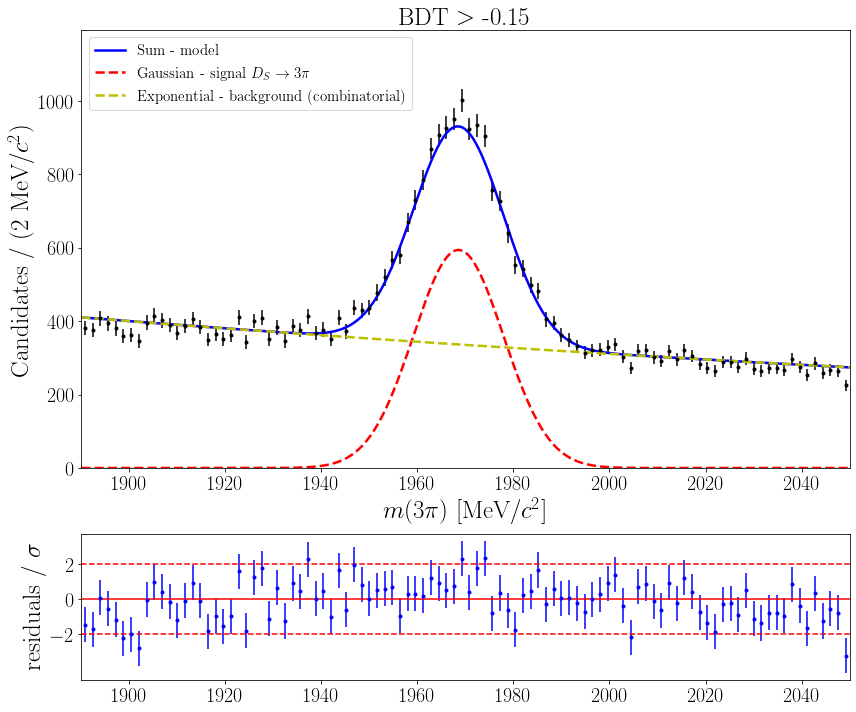

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM_allPIDK_try/tau_M_data_strip_cutDeltaM_allPIDK_try_fit_BDT-0.15.pdf


In [23]:
plot_hist_fit_particle(df[k],'tau_M',models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
                       name_models = [None, '$D_S \\to 3\pi$','(combinatorial)'], colors = ['b','r','y'],
                       obs=obs_tau, n_bins = 100, mode_hist = False, name_data=name_data+'_try', cut_BDT=cut_BDT,
                      fontsize_leg=15.)

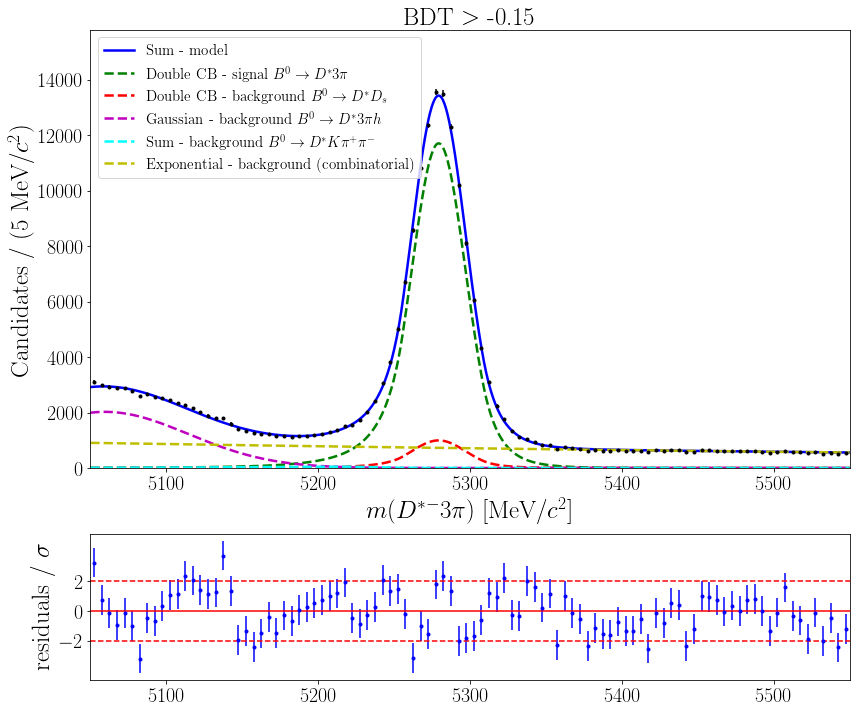

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM_allPIDK_try/B0_M_data_strip_cutDeltaM_allPIDK_try_fit_BDT-0.15.pdf


In [24]:
# n_sig_k = 120000
# n_bkg_k = 87000
# n_bkg2_k = 33000

# zparams['n_sig'].set_value(n_sig_k)
# zparams['n_bkg'].set_value(n_bkg_k)
# zparams['n_bkg2'].set_value(n_bkg2_k)
# zparams['n_bkgK'].set_value(n_bkgK_k)

plot_hist_fit_particle(df[k],'B0_M', models = [model,doubleCB_ext, doubleCB_Ds_ext, gaussian_ext, model_K_ext,exp_ext],
                       name_models = [None, '$B^0\\to D^* 3\pi$','$B^0\\to D^*D_s$','$B^0\\to D^*3\pi h$',
                                      '$B^0\\to D^* K \pi^+\pi^-$','(combinatorial)'],
                       obs=obs, n_bins = 100,mode_hist = False, fontsize_leg=15., colors=['b','g','r','m','cyan','y'],
                       name_data = name_data+'_try',cut_BDT=cut_BDT)

### Fitting

In [26]:
result, params = launch_fit([model_tau, model], [data_tau, data], extended=True)

------------------------------------------------------------------
| FCN = -1.488e+06              |     Ncalls=385 (385 total)     |
| EDM = 0.00841 (Goal: 0.001)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name                  value    minuit_hesse         minuit_minos    at limit
----------------  ---------  --------------  -------------------  ----------
n_sig_tau|-0.15        9272     +/- 1.6e+0

Info: VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
Info in Edm is smaller than machine accuracy : machineLimit = 0.0886808
Info in Current  Edm is : edm = 0.00841335
Info in Required Edm is : edmval = 0.001


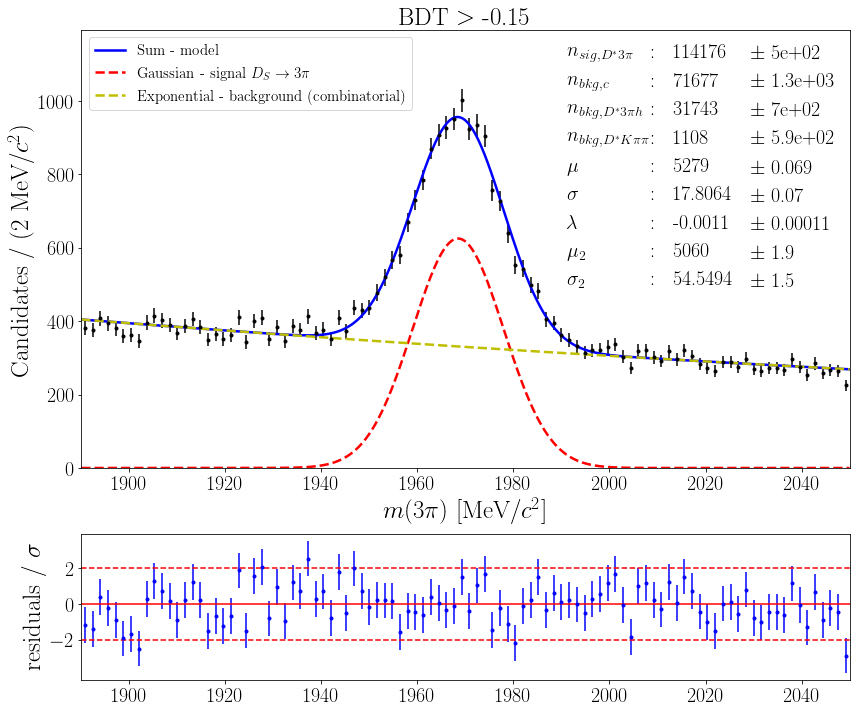

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM_allPIDK/tau_M_data_strip_cutDeltaM_allPIDK_fit_BDT-0.15.pdf


In [31]:
plot_hist_fit_particle(df[k],'tau_M',models = [model_tau,gaussian_ext_tau,exp_ext_tau], 
                       name_models = [None, '$D_S \\to 3\pi$','(combinatorial)'], colors = ['b','r','y'],
                       obs=obs_tau, n_bins = 100,mode_hist = False, name_data=name_data, cut_BDT=cut_BDT,
                      params=params,name_params=name_params, fontsize_leg=15., colWidths=[0.06,0.01,0.05,0.06])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


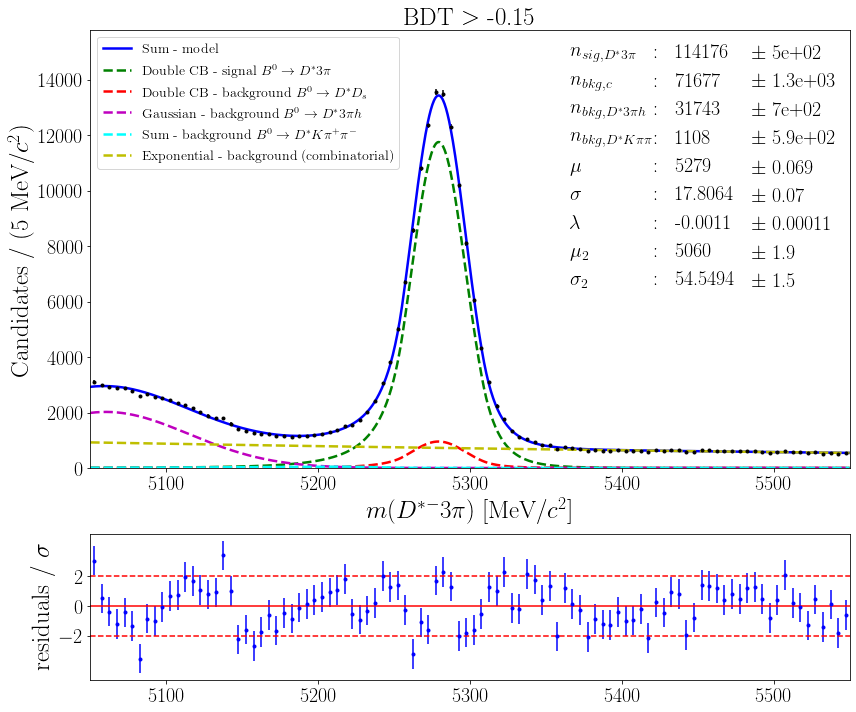

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_strip_cutDeltaM_allPIDK/B0_M_data_strip_cutDeltaM_allPIDK_fit_BDT-0.15.pdf


In [32]:
plot_hist_fit_particle(df[k],'B0_M', models = [model,doubleCB_ext, doubleCB_Ds_ext, gaussian_ext, model_K_ext,exp_ext],
                       name_models = [None, '$B^0\\to D^* 3\pi$','$B^0\\to D^*D_s$','$B^0\\to D^*3\pi h$',
                                      '$B^0\\to D^* K \pi^+\pi^-$','(combinatorial)'],
                       obs=obs, n_bins = 100,mode_hist = False,
                       name_data = name_data,cut_BDT=cut_BDT,
                       colors=['b','g','r','m','cyan','y'],
                       params=params,name_params=name_params, fontsize_leg=14.,
                       colWidths=[0.06,0.01,0.05,0.06])

In [57]:
save_params(params,f'cut_allPIDK_BDT{cut_BDT}',True)

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/cut_allPIDK_BDT0.4_params.json
